<a href="https://colab.research.google.com/github/drdrnissen/sdsphd21_TN/blob/main/sdsphd21_portfolio_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio for SDSPhD21

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2021.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 


#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignment for Monday ("Introduction to Machine Learning")

**Requirement**: Provide solutions for the clustering exercise.

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

# Portfolio assignment for Tuesday ("Introduction to Supervised Machine Learning")

**Requirement**: Provide solutions for the employee turnover assignment.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import numpy as np

Import dataset

In [3]:
nasty = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/value99.csv')
nasty.head()

v7  v9 v10  v14 v56 v57 v58 v59  ... v263 v264 v265 v266 v267 v268 v269 bald
0   2   1   1    1   1   1   1   2  ...    2    1    4    4    3    2    2   48
1   1   1   2    0   1   1   2   2  ...    2    2    2    1    2    2    1   30
2   1   1   2    0   1   1   1   1  ...    2    1    2    2    2    1    1   57
3   2   1   1    1   .   1   1   2  ...    2    2    4    3    3    3    2   55
4   1   1   2    0   1   1   2   1  ...    4    4    4    3    3    2    4   27

[5 rows x 91 columns]

I pick some variables, and rename them. The are focuesed on family, faith, faith in the goverment and to the authorities

In [4]:
nasty = nasty.replace('\.+', np.nan, regex=True)
# convert all columns of DataFrame
basty = nasty.apply(pd.to_numeric) # convert all columns of DataFrame
basty = basty[['v7', 'v56', 'v60', 'v61', 'v170', 'v174', 'v179', 'v188', 'v257', 'v261', 'v262', 'v263', 'v265', 'v266', 'v267', 'v269','bald']]
basty = basty.rename(columns={'v7':'koen', 'v56':'vig_fam', 'v60':'vig_pol', 'v61':'vig_rel', 'v170':'tro_G', 'v174':'tro_synd', 'v179':'troest', 'v188':'aegt_tro', 'v257':'til_for', 'v261':'til_poli', 'v262':'til_fol', 'v263':'til_off', 'v265':'til_EU', 'v266':'til_NATO', 'v267':'til_FN', 'v269':'til_ret', 'bald':'alder'}) 
basty.head()


koen  vig_fam  vig_pol  vig_rel  ...  til_NATO  til_FN  til_ret  alder
0     2      1.0      2.0      4.0  ...       4.0     3.0      2.0     48
1     1      1.0      1.0      1.0  ...       1.0     2.0      1.0     30
2     1      1.0      1.0      2.0  ...       2.0     2.0      1.0     57
3     2      NaN      2.0      2.0  ...       3.0     3.0      2.0     55
4     1      1.0      3.0      3.0  ...       3.0     3.0      4.0     27

[5 rows x 17 columns]

Here we drop the NaN values, to get a clean dataset to work on

In [19]:
#Drop NaN rows
no_nan = basty.dropna()
no_nan

koen  vig_fam  vig_pol  vig_rel  ...  til_NATO  til_FN  til_ret  alder
0        2      1.0      2.0      4.0  ...       4.0     3.0      2.0     48
1        1      1.0      1.0      1.0  ...       1.0     2.0      1.0     30
2        1      1.0      1.0      2.0  ...       2.0     2.0      1.0     57
5        2      2.0      2.0      3.0  ...       3.0     2.0      2.0     21
6        2      3.0      3.0      3.0  ...       3.0     2.0      2.0     60
...    ...      ...      ...      ...  ...       ...     ...      ...    ...
1015     2      2.0      3.0      3.0  ...       3.0     3.0      2.0     40
1017     2      1.0      3.0      4.0  ...       2.0     2.0      2.0     33
1018     1      2.0      2.0      2.0  ...       2.0     2.0      2.0     47
1020     1      1.0      2.0      4.0  ...       3.0     3.0      3.0     47
1021     1      2.0      3.0      3.0  ...       3.0     2.0      2.0     26

[650 rows x 17 columns]

Here we look at the mean score for the different categories based on sex (koen)

In [20]:
#v7 = køn 
no_nan.groupby(["koen"]).mean()

vig_fam   vig_pol   vig_rel  ...    til_FN   til_ret      alder
koen                                ...                               
1     1.666667  2.573770  3.090164  ...  2.275956  1.991803  45.355191
2     1.978873  2.647887  2.848592  ...  2.380282  2.105634  43.989437

[2 rows x 16 columns]

In [21]:
X = no_nan[['vig_fam', 'vig_pol', 'vig_rel', 'tro_G', 'tro_synd', 'troest', 'aegt_tro', 'til_poli', 'til_fol', 'til_off', 'til_EU', 'til_FN', 'til_ret']]
X_1 = no_nan[['vig_fam', 'vig_pol', 'vig_rel', 'tro_G', 'tro_synd', 'troest', 'aegt_tro', 'til_poli', 'til_fol', 'til_off', 'til_EU', 'til_FN', 'til_ret']]
not_cluster_set = no_nan[['koen', 'alder', 'til_for', 'til_NATO']]
linked = linkage(X, 'ward')

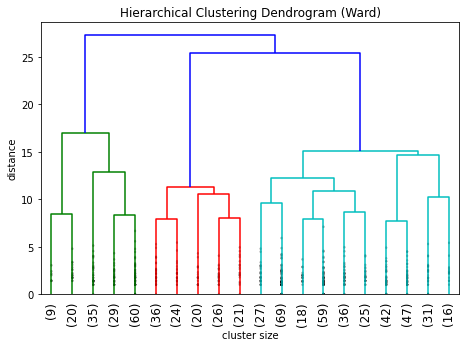

In [8]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

In [22]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    no_nan['cluster'+k]=labels

Cluster count- 2 |  db score- 2.43 |  ch score -  72.77 |  ss score -  0.13
Cluster count- 3 |  db score- 2.29 |  ch score -  75.23 |  ss score -  0.11
Cluster count- 4 |  db score- 2.05 |  ch score -  63.59 |  ss score -  0.11
Cluster count- 5 |  db score- 2.55 |  ch score -  56.35 |  ss score -  0.08
Cluster count- 6 |  db score- 2.29 |  ch score -  52.12 |  ss score -  0.06
Cluster count- 7 |  db score- 2.23 |  ch score -  48.28 |  ss score -  0.06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Cluster count- 8 |  db score- 2.37 |  ch score -  45.39 |  ss score -  0.06
Cluster count- 9 |  db score- 2.52 |  ch score -  42.83 |  ss score -  0.06
Cluster count- 10 |  db score- 2.47 |  ch score -  40.79 |  ss score -  0.06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

I dont understand the above errors, and why the clusters are not reported consecutive :-/

In [11]:
no_nan.head()

koen  vig_fam  vig_pol  vig_rel  ...  cluster7  cluster8  cluster9  cluster10
0     2      1.0      2.0      4.0  ...         0         2         0          9
1     1      1.0      1.0      1.0  ...         4         4         4          4
2     1      1.0      1.0      2.0  ...         4         4         4          4
5     2      2.0      2.0      3.0  ...         0         2         0          9
6     2      3.0      3.0      3.0  ...         1         1         1          1

[5 rows x 26 columns]

In [52]:
cluster_set = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)
labels=cluster.labels_
no_nan['cluster']=labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Here we take a look on age and religion. I suspect the yellow markers to be men, and the blue to be female, and it seems the women are more into religion and rate it higher than men, in all age-groups, but the circles are overlapping, and not giving the full picture

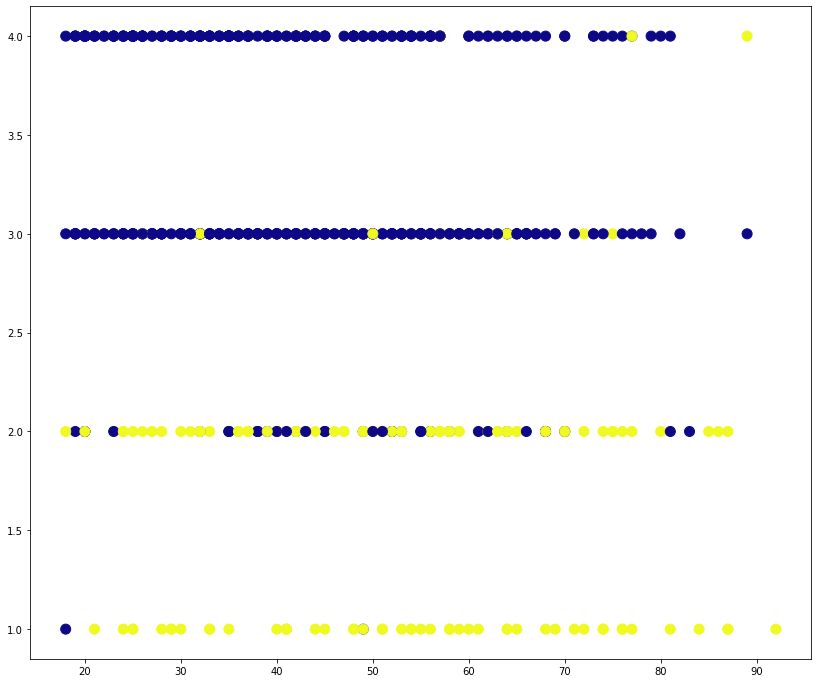

In [47]:
no_nan_f=no_nan.loc[no_nan['vig_rel']<0,:]
plt.figure(figsize=(14, 12))
plt.scatter(no_nan.alder, no_nan.vig_rel, s=100, c=no_nan.cluster2, cmap='plasma')

In [54]:
type(no_nan)

pandas.core.frame.DataFrame

In [55]:
no_nan.head()

koen  vig_fam  vig_pol  vig_rel  ...  cluster8  cluster9  cluster10  cluster
0     2      1.0      2.0      4.0  ...         2         0          9        9
1     1      1.0      1.0      1.0  ...         4         4          4        4
2     1      1.0      1.0      2.0  ...         4         4          4        4
5     2      2.0      2.0      3.0  ...         2         0          9        9
6     2      3.0      3.0      3.0  ...         1         1          1        1

[5 rows x 27 columns]

In [56]:
for i in range(2,6):
    i=str(i)											
    X_1=no_nan[['cluster'+i,'koen', 'vig_fam', 'vig_pol', 'vig_rel', 'tro_G', 'tro_synd', 'troest', 'aegt_tro', 'til_for', 'til_poli', 'til_fol', 'til_off', 'til_EU', 'til_NATO', 'til_FN', 'til_ret', 'alder']]
    stuff=X_1.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("")
    count=no_nan.groupby(['cluster'+i])['id'].count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()



... and the results for 2 clusters are!
cluster2      0      1
koen       1.40   1.56
vig_fam    1.76   1.94
vig_pol    2.64   2.50
vig_rel    3.33   1.85
tro_G      1.47   1.03
tro_synd   1.89   1.51
troest     1.86   1.14
aegt_tro   1.20   1.12
til_for    2.41   2.16
til_poli   1.87   1.75
til_fol    2.53   2.38
til_off    2.45   2.42
til_EU     2.95   2.81
til_NATO   2.44   2.29
til_FN     2.33   2.29
til_ret    2.06   1.98
alder     42.33  52.65



KeyError: ignored

Jeg forstår ikke ovenstående mangel på 'id'. Jeg har samme DataFrame type som i Clustering.ipynb fra Rolfs undervisning. Det er som om, den kun tager de to første clustere. cluster2 og cluster3, men ikke de resterende clustere. Jeg går lidt i stå her :-/

## Supervised Machine Learning: Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression

Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use [`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to get dummies for categorical variables.

Classification

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set(style="darkgrid", color_codes=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
turnover = pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/turnover.csv")
turnover.head()
#type(turnover['average_montly_hours'])

satisfaction  evaluation  number_of_projects  ...  promotion  department  salary
0          0.38        0.53                   2  ...          0       sales     low
1          0.80        0.86                   5  ...          0       sales  medium
2          0.11        0.88                   7  ...          0       sales  medium
3          0.72        0.87                   5  ...          0       sales     low
4          0.37        0.52                   2  ...          0       sales     low

[5 rows x 10 columns]

In [71]:
turnover["average_weekly_hours"] = turnover["average_montly_hours"] / 4
turnover.head()

satisfaction  evaluation  ...  salary  average_weekly_hours
0          0.38        0.53  ...     low                 39.25
1          0.80        0.86  ...  medium                 65.50
2          0.11        0.88  ...  medium                 68.00
3          0.72        0.87  ...     low                 55.75
4          0.37        0.52  ...     low                 39.75

[5 rows x 11 columns]

In [19]:
turnover.describe()

satisfaction    evaluation  ...     promotion  average_weekly_hours
count  14999.000000  14999.000000  ...  14999.000000          14999.000000
mean       0.612834      0.716102  ...      0.021268             50.262584
std        0.248631      0.171169  ...      0.144281             12.485775
min        0.090000      0.360000  ...      0.000000             24.000000
25%        0.440000      0.560000  ...      0.000000             39.000000
50%        0.640000      0.720000  ...      0.000000             50.000000
75%        0.820000      0.870000  ...      0.000000             61.250000
max        1.000000      1.000000  ...      1.000000             77.500000

[8 rows x 9 columns]

In [11]:
corr = turnover.corr()

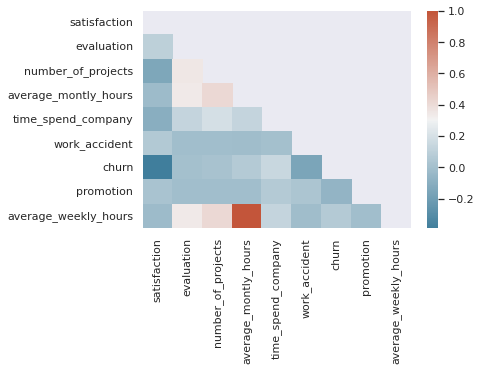

In [12]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))


sns.heatmap(corr,mask=mask, cmap=cmap)

In [20]:
turnover.head()

satisfaction  evaluation  ...  salary  average_weekly_hours
0          0.38        0.53  ...     low                 39.25
1          0.80        0.86  ...  medium                 65.50
2          0.11        0.88  ...  medium                 68.00
3          0.72        0.87  ...     low                 55.75
4          0.37        0.52  ...     low                 39.75

[5 rows x 11 columns]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [89]:
y = turnover.iloc[:,6:7]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#y = turnover['churn'].to_numpy()
#X = turnover
#X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
#X.iloc[X_train] # return dataframe train
#X = turn
#X = turnover[['satisfaction',	'evaluation',	'number_of_projects',	'time_spend_company',	'work_accident',	'promotion',	'department',	'salary',	'average_weekly_hours']]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
X = turnover[['satisfaction',	'evaluation',	'number_of_projects',	'time_spend_company',	'work_accident',	'promotion',	'average_weekly_hours', 'department',	'salary']]

In [79]:
X

satisfaction  evaluation  ...  department  salary
0              0.38        0.53  ...       sales     low
1              0.80        0.86  ...       sales  medium
2              0.11        0.88  ...       sales  medium
3              0.72        0.87  ...       sales     low
4              0.37        0.52  ...       sales     low
...             ...         ...  ...         ...     ...
14994          0.40        0.57  ...     support     low
14995          0.37        0.48  ...     support     low
14996          0.37        0.53  ...     support     low
14997          0.11        0.96  ...     support     low
14998          0.37        0.52  ...     support     low

[14999 rows x 9 columns]

In [54]:
type(X)

pandas.core.frame.DataFrame

In [75]:
X1 = X.iloc[:,0:7]
X1

satisfaction  evaluation  ...  promotion  average_weekly_hours
0              0.38        0.53  ...          0                 39.25
1              0.80        0.86  ...          0                 65.50
2              0.11        0.88  ...          0                 68.00
3              0.72        0.87  ...          0                 55.75
4              0.37        0.52  ...          0                 39.75
...             ...         ...  ...        ...                   ...
14994          0.40        0.57  ...          0                 37.75
14995          0.37        0.48  ...          0                 40.00
14996          0.37        0.53  ...          0                 35.75
14997          0.11        0.96  ...          0                 70.00
14998          0.37        0.52  ...          0                 39.50

[14999 rows x 7 columns]

In [76]:
department_d = pd.get_dummies(X['department'])

In [77]:
salary_d = pd.get_dummies(X['salary'])

In [78]:
X2 = pd.concat([X1, salary_d], axis=1)
X2.head()

satisfaction  evaluation  number_of_projects  ...  high  low  medium
0          0.38        0.53                   2  ...     0    1       0
1          0.80        0.86                   5  ...     0    0       1
2          0.11        0.88                   7  ...     0    0       1
3          0.72        0.87                   5  ...     0    1       0
4          0.37        0.52                   2  ...     0    1       0

[5 rows x 10 columns]

In [80]:
X2 = pd.concat([X1, department_d], axis=1)
X2.head()

satisfaction  evaluation  number_of_projects  ...  sales  support  technical
0          0.38        0.53                   2  ...      1        0          0
1          0.80        0.86                   5  ...      1        0          0
2          0.11        0.88                   7  ...      1        0          0
3          0.72        0.87                   5  ...      1        0          0
4          0.37        0.52                   2  ...      1        0          0

[5 rows x 17 columns]

In [81]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
X_scaled = StandardScaler().fit_transform(X2)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X2, y)

In [99]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [100]:
model_ols = LinearRegression()
model_el = ElasticNet()
model_rf = RandomForestRegressor(n_estimators=25)

In [101]:
model_ols.fit(X_train, y_train)
model_el.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25)

In [102]:
print('Model OLS' + ' ' + str(model_ols.score(X_test, y_test)))
print('Model EL' + ' ' + str(model_el.score(X_test, y_test)))
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))

Model OLS 0.19724993877620078
Model EL -0.00015897535840680987
Model RF 0.937896623027154


In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 21)

In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000) # since we have 3 classes
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [106]:
model.score(X_test, y_test)

0.7573333333333333

In [108]:
true_churn = labelencoder_y.inverse_transform(y_test)

predicted_churn = labelencoder_y.inverse_transform(model.predict(X_test))

In [109]:
df = pd.DataFrame({'true_churn': true_churn, 'predicted_churn': predicted_churn}) 

pd.crosstab(df.true_churn, df.predicted_churn)

predicted_churn     0    1
true_churn                
0                2109  175
1                 553  163

Regression

# Portfolio assignments for Wednesday ("Introduction to Geospatial Data" & "Introduction to Network Analysis in Python")

**Requirement:** Provide solutions for the geospatial data exercise *and* the network analysis exercise.

## Geospatial data: Map data of your choice

Try to go here:
https://ec.europa.eu/eurostat/data/database

And look for statistics that are on NUTS level 2

Then go grab this data: https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip

In [113]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)
!pip install adjustText # Adjusting text in maps

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 31.9 MB/s 
     |████████████████████████████████| 15.4 MB 21.9 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=31c37bfcbf29fb666fa71a09bf30b86a727edaa928a182e9ab5da4cb6ca2782a
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [114]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [115]:
!wget "https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip"
!unzip NUTS_RG_20M_2021_3035_LEVL_2.shp.zip

--2021-12-10 17:07:05--  https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip [following]
--2021-12-10 17:07:06--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159016 (155K) [application/zip]
Saving to: ‘NUTS_RG_20M_2021_3035_LEVL_2.shp.zip.1’

NUTS_RG_20M_2021_30 100%[===================>] 155.29K  --.-KB/s    in 0.02s   


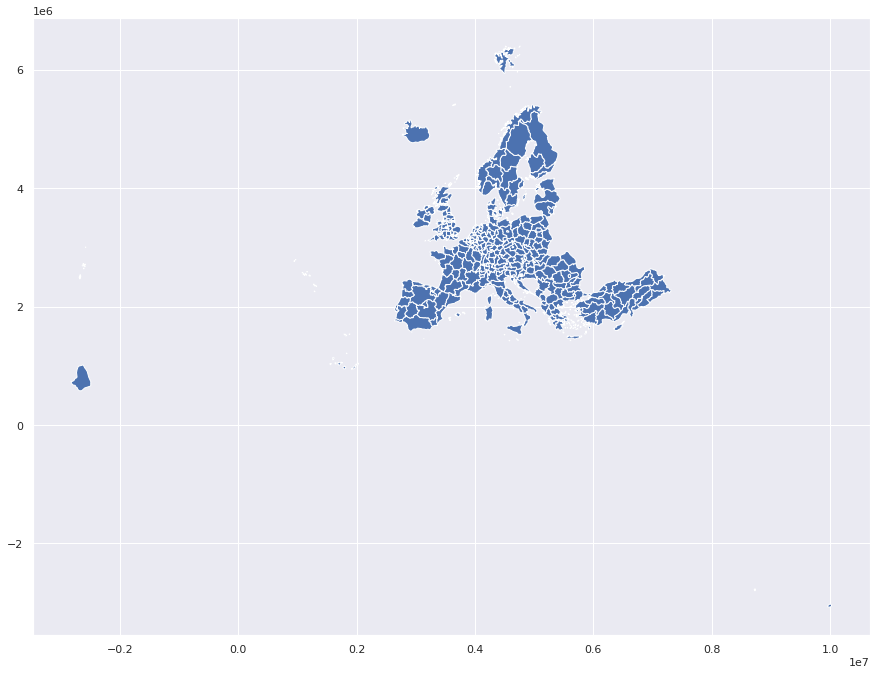

In [116]:
nuts = gdp.read_file("NUTS_RG_20M_2021_3035_LEVL_2.shp")
nuts.plot(figsize=(15,15))

Try to do something cool with the data and map some stuff. Remember; the layer is NUTS level 2, so you need data that fits. Furthermore, you might want to consider a subset of the areas. Country name is specified in the column: "CNTR_CODE" and the "key" for most statistics in eurostat is "NUTS_NAME"

In [164]:
nuts.head()

NUTS_ID  LEVL_CODE  ...                                           geometry label
0    CZ05          2  ...  POLYGON ((4710986.851 3088955.848, 4729795.896...  CZ05
1    CZ06          2  ...  POLYGON ((4715869.727 2986862.871, 4782782.205...  CZ06
2    CZ07          2  ...  POLYGON ((4929608.184 2955255.716, 4924768.599...  CZ07
3    CZ08          2  ...  POLYGON ((4895030.487 3026304.289, 4917489.492...  CZ08
4    DE11          2  ...  POLYGON ((4327060.365 2936754.230, 4329577.592...  DE11

[5 rows x 11 columns]

In [142]:
type(nuts)

geopandas.geodataframe.GeoDataFrame

Data import from https://ec.europa.eu/eurostat/databrowser/view/tgs00077/default/table?lang=en in xlsx format. Unfortunatly no direct link is available
The file is renamed locally to air_tra.xlsx and importet to CoLab
The data is from 2019

In [138]:
air_trans= pd.read_excel('air_tra.xlsx')
air_trans

GEO (Codes)           GEO (Labels)  Annual_passengers_caried_in_thousand
0          BE21        Prov. Antwerpen                                 290.0
1          BE24   Prov. Vlaams-Brabant                               26287.0
2          BE25  Prov. West-Vlaanderen                                 445.0
3          BE32          Prov. Hainaut                                8197.0
4          BE33            Prov. Liège                                 167.0
..          ...                    ...                                   ...
257        UKM7       Eastern Scotland                               14755.0
258        UKM8  West Central Scotland                                8834.0
259        UKM9      Southern Scotland                                 639.0
260        UKN0  Northern Ireland (UK)                                8935.0
261        UKZZ     Extra-Regio NUTS 2                                 461.0

[262 rows x 3 columns]

In [139]:
print(air_trans.loc[0:185, ['GEO (Labels)']])

                        GEO (Labels)
0                    Prov. Antwerpen
1               Prov. Vlaams-Brabant
2              Prov. West-Vlaanderen
3                      Prov. Hainaut
4                        Prov. Liège
..                               ...
181  Região Autónoma da Madeira (PT)
182                        Nord-Vest
183                           Centru
184                         Nord-Est
185                          Sud-Est

[186 rows x 1 columns]


In [140]:
type(air_trans)

pandas.core.frame.DataFrame

In [141]:
air_trans=air_trans.rename(columns={'GEO (Codes)':'NUTS_NAME'})
air_trans

NUTS_NAME           GEO (Labels)  Annual_passengers_caried_in_thousand
0        BE21        Prov. Antwerpen                                 290.0
1        BE24   Prov. Vlaams-Brabant                               26287.0
2        BE25  Prov. West-Vlaanderen                                 445.0
3        BE32          Prov. Hainaut                                8197.0
4        BE33            Prov. Liège                                 167.0
..        ...                    ...                                   ...
257      UKM7       Eastern Scotland                               14755.0
258      UKM8  West Central Scotland                                8834.0
259      UKM9      Southern Scotland                                 639.0
260      UKN0  Northern Ireland (UK)                                8935.0
261      UKZZ     Extra-Regio NUTS 2                                 461.0

[262 rows x 3 columns]

In [121]:
print([nuts.columns])

[Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID', 'geometry'],
      dtype='object')]


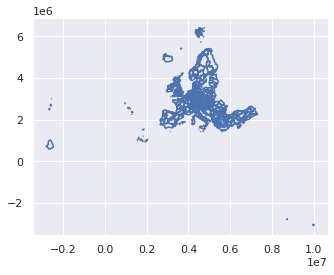

In [123]:
nuts.boundary.plot()

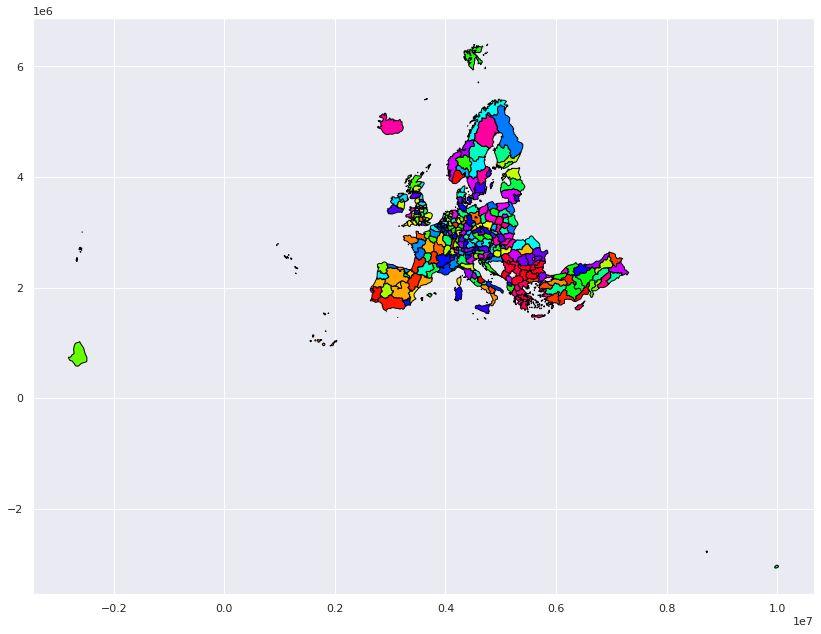

In [124]:
nuts.plot(cmap='hsv', edgecolor='black', column='NUTS_NAME', figsize=(14,14))

In [125]:
nuts.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 10 entries, NUTS_ID to geometry
dtypes: float64(2), geometry(1), int64(2), object(5)
memory usage: 26.2+ KB


In [143]:
print(nuts.loc[0:334, ['NUTS_ID']])

    NUTS_ID
0      CZ05
1      CZ06
2      CZ07
3      CZ08
4      DE11
..      ...
329    NO08
330    NO09
331    NO0A
332    NO07
333    NO0B

[334 rows x 1 columns]


In [148]:
nuts["label"]=nuts["NUTS_ID"]
land = nuts.dissolve(by='NUTS_ID')
land.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 334 entries, AL01 to UKN0
Columns: 10 entries, geometry to label
dtypes: float64(2), geometry(1), int64(2), object(5)
memory usage: 38.7+ KB


In [176]:
land

geometry  ...  label
NUTS_ID                                                     ...       
AL01     POLYGON ((5129579.170 2204098.752, 5148385.473...  ...   AL01
AL02     POLYGON ((5148777.300 2099959.278, 5178238.968...  ...   AL02
AL03     POLYGON ((5247352.798 2040320.505, 5257241.465...  ...   AL03
AT11     POLYGON ((4846489.857 2803511.391, 4854633.294...  ...   AT11
AT12     POLYGON ((4742889.368 2876362.725, 4783217.798...  ...   AT12
...                                                    ...  ...    ...
UKM6     MULTIPOLYGON (((3301941.755 3726954.474, 33103...  ...   UKM6
UKM7     POLYGON ((3564651.012 3804905.275, 3550998.788...  ...   UKM7
UKM8     POLYGON ((3444218.494 3742743.729, 3452734.256...  ...   UKM8
UKM9     POLYGON ((3517247.564 3635893.782, 3505060.008...  ...   UKM9
UKN0     POLYGON ((3309324.536 3662898.099, 3308298.609...  ...   UKN0

[334 rows x 10 columns]

In [167]:
nuts

NUTS_ID  LEVL_CODE  ...                                           geometry label
0      CZ05          2  ...  POLYGON ((4710986.851 3088955.848, 4729795.896...  CZ05
1      CZ06          2  ...  POLYGON ((4715869.727 2986862.871, 4782782.205...  CZ06
2      CZ07          2  ...  POLYGON ((4929608.184 2955255.716, 4924768.599...  CZ07
3      CZ08          2  ...  POLYGON ((4895030.487 3026304.289, 4917489.492...  CZ08
4      DE11          2  ...  POLYGON ((4327060.365 2936754.230, 4329577.592...  DE11
..      ...        ...  ...                                                ...   ...
329    NO08          2  ...  POLYGON ((4226322.205 4220417.267, 4276802.361...  NO08
330    NO09          2  ...  POLYGON ((4339135.109 4065666.746, 4342546.778...  NO09
331    NO0A          2  ...  MULTIPOLYGON (((4258515.326 4480648.690, 42645...  NO0A
332    NO07          2  ...  MULTIPOLYGON (((5073773.420 5207018.495, 50670...  NO07
333    NO0B          2  ...  MULTIPOLYGON (((4754167.335 6382461.408, 47465...  NO0B

[334 rows x 11 columns]

In [188]:
print(nuts.iloc[0:10, 8])

0    CZ05
1    CZ06
2    CZ07
3    CZ08
4    DE11
5    DE12
6    DE13
7    DE14
8    DE21
9    DE22
Name: FID, dtype: object


In [179]:
boolean = not land["label"].is_unique      # True (credit to @Carsten)
boolean = land['label'].duplicated().any() # True
boolean = land.duplicated(subset=['label']).any()
boolean

False

In [195]:
air_trafun = land.merge(air_trans, left_on='label', right_on="NUTS_NAME", how='left', validate="one_to_one")
air_trafun.head()

geometry  ...  Annual_passengers_caried_in_thousand
0  POLYGON ((5129579.170 2204098.752, 5148385.473...  ...                                   NaN
1  POLYGON ((5148777.300 2099959.278, 5178238.968...  ...                                   NaN
2  POLYGON ((5247352.798 2040320.505, 5257241.465...  ...                                   NaN
3  POLYGON ((4846489.857 2803511.391, 4854633.294...  ...                                   NaN
4  POLYGON ((4742889.368 2876362.725, 4783217.798...  ...                               31635.0

[5 rows x 13 columns]

I can't find out why there is to many NUTS_ID and labels in 'land' and in 'nuts', but missing nuts in 'air_trans'. Ie. AL is missing in my EU air-transportation dataset

So I will proceed with a none-lossless method

In [200]:
air_trafun_loss = air_trafun.dropna(subset=['Annual_passengers_caried_in_thousand'])
air_trafun_loss.head()

geometry  ...  Annual_passengers_caried_in_thousand
4  POLYGON ((4742889.368 2876362.725, 4783217.798...  ...                               31635.0
6  POLYGON ((4522751.261 2668742.613, 4555161.946...  ...                                 210.0
7  POLYGON ((4760796.641 2734593.840, 4780029.485...  ...                                1035.0
8  POLYGON ((4666960.763 2841107.593, 4680267.486...  ...                                 430.0
9  POLYGON ((4567548.314 2771539.234, 4567562.680...  ...                                1730.0

[5 rows x 13 columns]

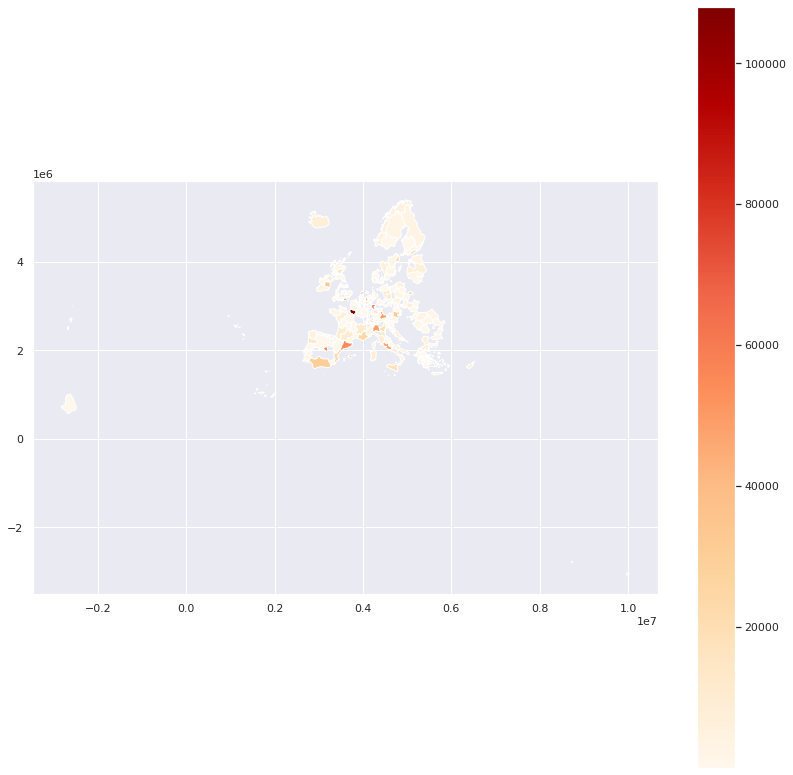

In [202]:
air_trafun_loss.plot(column="Annual_passengers_caried_in_thousand", legend="True", figsize=(14,14), cmap='OrRd')

So it seems that there a regions without any airports, thats why they are missing. But ie. Oslo is missing and got an aiport, so that's weird.

## Network analysis: Directed Networks: Friends & Foes at Work (Case Study)

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [204]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

     |████████████████████████████████| 18.5 MB 668 kB/s 
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.2 which is incompatible.
     |████████████████████████████████| 10.7 MB 5.0 MB/s 


In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
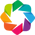

In [206]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [207]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [208]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [209]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [210]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [211]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [212]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [213]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [214]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [215]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653154

In [216]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.036510830626211646

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [217]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

1. Reciprocity

In [218]:
#Work network
out1 = nx.overall_reciprocity(G_work)

#Advise network
out2 = nx.overall_reciprocity(G_advice)

print(out1)
print(out2)



1.0
0.3923766816143498


The numbers differ due to people how work the same place, have a proximity to one, and zero to another workspace

In advice, you could ask your collegue or a known person from another company

2. Identify communities

In [219]:
print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

In [220]:
import community.community_louvain as community_louvain

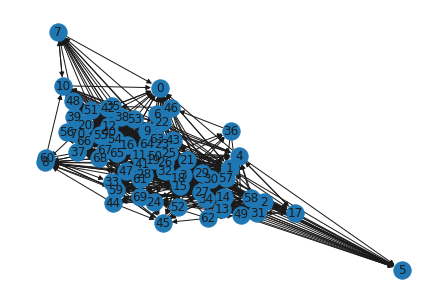

In [221]:
nx.draw(G_advice, with_labels=True)

In [222]:
print(nx.info(G_advice))

DiGraph with 71 nodes and 892 edges


In [223]:
# Create and save a layout.
G_advice_layout = nx.layout.fruchterman_reingold_layout(G_advice) 

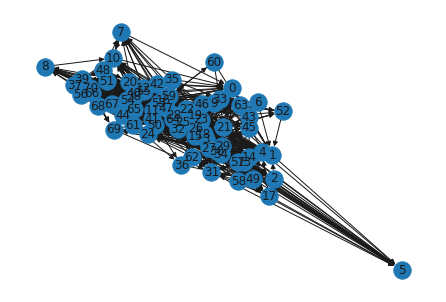

In [224]:
# We use the standard networkx plot, and pass the layout.

nx.draw(G_advice, pos = G_advice_layout, with_labels=True)

In [225]:
for n1, n2, d in G_advice.edges(data=True):
  d.pop('weight', None)
print(nx.info(G_advice))

DiGraph with 71 nodes and 892 edges


Below we make the graph Undirected

In [226]:
G_advice2 = G_advice.to_undirected()
print(nx.info(G_advice2))

Graph with 71 nodes and 717 edges


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
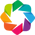

In [227]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.01,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))



In [228]:
g_advice_plot = hv.Graph.from_networkx(G_advice, G_advice_layout).opts(tools=['hover'])

In [229]:
show(hv.render(g_advice_plot))

In [230]:
import community.community_louvain as community_louvain

In [231]:
# Find the optimal partition with the Louvain algorithm.
com = community_louvain.best_partition(G_advice2)

In [232]:
# Find the optimal partition with the Louvain algorithm.
com = community_louvain.best_partition(G_advice2)

Here we find two networks

In [233]:
# The number of communities detected
max(com.values())

2

In [234]:
# Create and save a layout.
G_friend_layout = nx.layout.fruchterman_reingold_layout(G_friendship) 

In [235]:
G_friendship2 = G_friendship.to_undirected()
print(nx.info(G_friendship2))

Graph with 71 nodes and 399 edges


Here we vizualize the communities with different colours. It seems there is an orange and a red community, and the grey are in in a community

In [236]:
nx.set_node_attributes(G_friendship2, com, 'community')

g_plot = hv.Graph.from_networkx(G_friendship2, G_friend_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  edge_alpha=0.15,
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

# Thursday: NLP

![](https://sds-aau.github.io/SDS-2021/images/elon.jpg)

The site [https://faketrump.ai/](https://faketrump.ai/) **WAS** an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset. Also Tump is gone...
Therefore: Elon it is!

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that projects, Roman decided to retrain GPT-2 to generate new fake Elon tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

Here some examples:

> We’ll only do one or two at a time. @S@Erdayastronaut @SpaceX SN4 with F9 engine is ~$3M in cost &amp; Starship is ~$100M in production. Only ~$100M with F9 booster._Padival @Tesla Will update with any situation. It was meant to be obvious.

> @Erdayastronaut @SpaceX SN4 with F9 engine is ~$3M in cost &amp; Starship is ~$100M in production. Only ~$100M with F9 booster.

> If you buy a car, you will get a self-driving car that works best on any climate, no matter how smoggy. We’re fixing that.

 The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/master/M3/assignments/find_elon.gz) and has the following format:

| tweet  | real    |
|--------|---------|
| string | boolean |

There are 1577 real Elon tweets and 1577 fake ones.

Your job is to train and apply a supervised machine learning model to detect fake Elon tweets!

In [237]:
import pandas as pd
import numpy as np

In [238]:
data = pd.read_csv("https://github.com/SDS-AAU/SDS-master/raw/master/M3/assignments/find_elon.gz")

In [239]:
data.head()

0  1
0     @WhatsupFranks @lexfridman NPCs all the way up  1
1  We’ll only do one or two at a time. @S_Padival...  0
2  @Erdayastronaut @SpaceX SN4 with F9 engine is ...  0
3  @LarryKellogg @arctechinc The Tesla FSD comput...  1
4  @brainwipe There would def be millions of agen...  1

In [240]:
# some basic text cleaning, removing HTML fragments (only a problem here)

import re

pattern = re.compile('<br /><br />')

print(data['0'].iloc[3])
print(pattern.subn(' ', data['0'].iloc[3])[0])

@LarryKellogg @arctechinc The Tesla FSD computer started shipping in volume in Q2 2019. 2020 cars should all have FSD computers, whether or not  ordered as an option.
@LarryKellogg @arctechinc The Tesla FSD computer started shipping in volume in Q2 2019. 2020 cars should all have FSD computers, whether or not  ordered as an option.


In [241]:
# application of the cleaning mask to everthing

data['0'] = data['0'].apply(lambda text: pattern.subn(' ', text)[0])
data['0'] = data['0'].apply(lambda text: pattern.subn(' ', text)[0])
data

0  1
0        @WhatsupFranks @lexfridman NPCs all the way up  1
1     We’ll only do one or two at a time. @S_Padival...  0
2     @Erdayastronaut @SpaceX SN4 with F9 engine is ...  0
3     @LarryKellogg @arctechinc The Tesla FSD comput...  1
4     @brainwipe There would def be millions of agen...  1
...                                                 ... ..
3149  In fact, the tunnel will not be there for seve...  0
3150  Tesla dual motor means there is a motor in fro...  1
3151    Hey babe, fancy a hot date …? 😉 @4thFromOurStar  1
3152  If you buy a car, you will get a self-driving ...  0
3153                    @richardreinariv He has no clue  1

[3154 rows x 2 columns]

In [242]:
# module to split data into training / test
from sklearn.model_selection import train_test_split

In [243]:
# define in and outputs

X = data['0'].values
y = data['1'].values

In [244]:
# Let's fire up spacy

import spacy

# and load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

# find more models for other languages here: https://spacy.io/models/

In [245]:
# Split the data in 80% trainig 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [246]:
# Simple BoW vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [247]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [248]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(max_iter=2000)

In [249]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test)

In [250]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.8431061806656102

In [251]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)

In [252]:
# confusion matrix by hand... :-)

pd.crosstab(y_test, y_pred)

col_0    0    1
row_0          
0      270   53
1       46  262

OR

In [270]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[270  53]
 [ 46 262]]


In [279]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.85      0.84      0.85       323
           1       0.83      0.85      0.84       308

    accuracy                           0.84       631
   macro avg       0.84      0.84      0.84       631
weighted avg       0.84      0.84      0.84       631

